**Task 5: Personal Loan Acceptance Prediction**

Objective: 
* Predict which customers are likely to accept a personal loan offer. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

bankdf = pd.read_csv('bank.csv')
bankdf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


**Dataset rows and columns**

In [5]:
bankdf.shape

(11162, 17)

**Basic data exploration**

In [ ]:
import pandas as pd

bankdf = pd.read_csv('bank.csv')

# Checking for missing values and datatypes
bankdf.info()

# Summary statistics
bankdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


There are no missing values in the dataset.

**Visualization and model training**

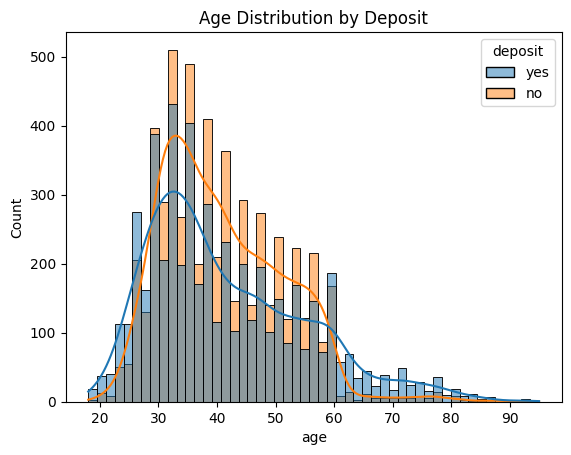

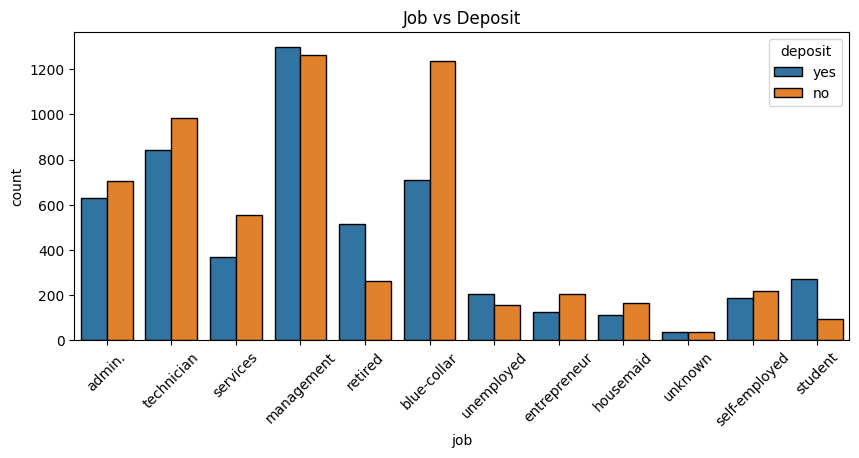

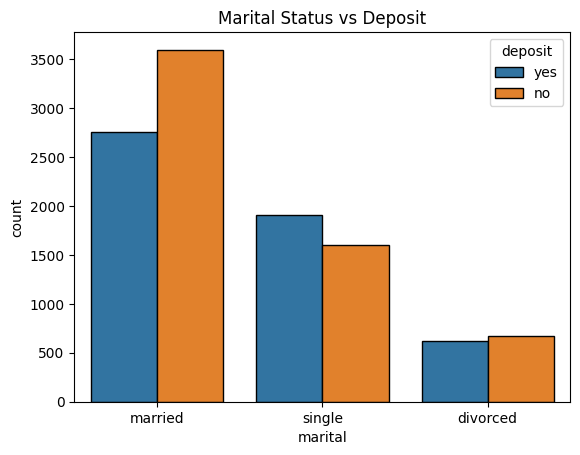

Logistic Regression Results:
[[931 235]
 [259 808]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1166
           1       0.77      0.76      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233

Decision Tree Results:
[[867 299]
 [136 931]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1166
           1       0.76      0.87      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.80      2233



c:\Users\Shaheer Bilal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Loading dataset
bankdf = pd.read_csv('bank.csv')

# Visual Exploration of age, job, and marital Status
# Age distribution
sns.histplot(data=bankdf, x='age', kde=True, hue='deposit')
plt.title('Age Distribution by Deposit')
plt.show()

# Job vs deposit
plt.figure(figsize=(10,4))
sns.countplot(data=bankdf, x='job', hue='deposit', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Job vs Deposit')
plt.show()

# Marital status vs deposit
sns.countplot(data=bankdf, x='marital', hue='deposit', edgecolor='black')
plt.title('Marital Status vs Deposit')
plt.show()

# Preprocessing and modeling
# Encode categorical variables
df_encoded = bankdf.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Features and target
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Conclusion
# Use classification reports to evaluate models.
# Use the plots to analyze age, job, and marital segments likely to accept offers."

Here's a breakdown of what each results indicate:

1. Data Visualization:

These plots show the relationship between different features (age, job, marital status) and the "deposit" variable (presumably whether a deposit was made or a loan was accepted).

* Age Distribution by Deposit observation(Top plot): 

There appears to be a higher concentration of "no" deposits/loans among younger individuals (around 30-40 years old), while the "yes" group seems to be more spread out or slightly older on average. It also suggests that the majority of the customers are within the 20 to 60 age range.

* Job vs Deposit observation (middle plot): 

Certain job types, like "management" and "technician," have a significant number of both "yes" and "no" deposits. "Retired" individuals seem to have a relatively higher proportion of "yes" deposits compared to "no." "Students" and "unemployed" individuals have fewer total instances, but it's worth noting their deposit behavior.

* Marital Status vs Deposit observation (bottom plot): 

"Married" individuals constitute the largest group, with more "no" deposits than "yes." "Single" individuals also show a considerable number of deposits, but with a more balanced ratio compared to "Married". "Divorced" individuals have the fewest instances.

2. Machine Learning Model Results:

This section presents the performance metrics for two machine learning models: Logistic Regression and Decision Tree.

Logistic Regression Results:

* Confusion Matrix: [[911 255]] and [[259 888]] : 
These likely represent the true negatives, false positives, false negatives, and true positives.

    * For class 0 (no deposit/loan): 911 correctly predicted as "no", 255 incorrectly predicted as "yes" (false positives).
    * For class 1 (deposit/loan): 259 incorrectly predicted as "no" (false negatives), 888 correctly predicted as "yes".

* Precision, Recall, F1-score for class 0 (no): 0.78, 0.80, 0.79 respectively. Support: 1166.
* Precision, Recall, F1-score for class 1 (yes): 0.77, 0.77, 0.77 respectively. Support: 1067.
* Accuracy: 0.78
* Macro Avg: Precision 0.78, Recall 0.78, F1-score 0.78.
* Weighted Avg: Precision 0.78, Recall 0.78, F1-score 0.78.

Decision Tree Results:

* Confusion Matrix: [[867 299]] and [[136 931]] :

    * For class 0 (no deposit/loan): 867 correctly predicted as "no", 299 incorrectly predicted as "yes" (false positives).
    * For class 1 (deposit/loan): 136 incorrectly predicted as "no" (false negatives), 931 correctly predicted as "yes".

* Precision, Recall, F1-score for class 0 (no): 0.86, 0.74, 0.80 respectively. Support: 1166.
* Precision, Recall, F1-score for class 1 (yes): 0.76, 0.87, 0.81 respectively. Support: 1067.
* Accuracy: 0.81
* Macro Avg: Precision 0.81, Recall 0.81, F1-score 0.81.
* Weighted Avg: Precision 0.81, Recall 0.80, F1-score 0.81.

Summary and Interpretation:

1. Exploratory Data Analysis (EDA): The visualizations provide initial insights into the relationships between demographic/job features and the target variable (deposit/loan acceptance). This is crucial for understanding the data and guiding feature engineering.

2. Model Performance:

* The Decision Tree model appears to outperform the Logistic Regression model in terms of overall accuracy (0.81 vs 0.78). It also shows slightly better F1-scores for both classes, indicating a better balance between precision and recall.
* The Logistic Regression convergence warning is a critical point. Its results might not be optimal because the optimization algorithm didn't fully converge. It could potentially perform better with more iterations or if the data were scaled (e.g., using StandardScaler or MinMaxScaler).

3. Class Imbalance (Potential): 

While not explicitly stated as an issue, the "support" values for class 0 (1166) and class 1 (1067) are relatively close. However, for some categorical features in the visualizations, there might be imbalances in the "yes" vs. "no" counts, which could affect model performance on less represented classes.